# Attentional Capture Alters Feature Perception

### *Jiageng Chen, Andrew Leber & Julie Golomb*

In [1]:
%matplotlib inline

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import pandas as pd
import itertools
import scipy
from userfun import smi
import scipy.stats as stats
# save matplotlib figure as the text editable version
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# datatable & fittingtable
dt1 = pd.read_csv('dt_exp1.csv')
ft1 = pd.read_csv('ft_exp1.csv')
dt2 = pd.read_csv('dt_exp2.csv')
ft2 = pd.read_csv('ft_exp2.csv')
mdcr = pd.read_csv('medianCR.csv')

## Data structure

In [4]:
ft1.columns

Index(['subject', 'gvalid', 'gneutral', 'ginvalid', 'b1valid', 'b1neutral',
       'b1invalid', 'b2valid', 'b2neutral', 'b2invalid', 'sdvalid',
       'sdneutral', 'sdinvalid', 'muvalid', 'muneutral', 'muinvalid', 'tvalid',
       'tneutral', 'tinvalid'],
      dtype='object')

In [5]:
dt1.columns

Index(['ID', 'Target', 'Response', 'Errors_resp_target',
       'DistErr_distractor_target', 'RT', 'TargetLoc', 'DistractorLoc',
       'BlockNumber', 'Err', 'flip', 'condition'],
      dtype='object')

In [6]:
dt2.columns

Index(['ID', 'Target', 'Response', 'Errors_resp_target',
       'DistErr_distractor_target', 'Click1', 'Click1_target', 'Click2',
       'Click2_target', 'ClickRange', 'Click1_resp', 'Click2_resp', 'RT',
       'TargetLoc', 'DistractorLoc', 'BlockNumber', 'Err', 'flip',
       'condition'],
      dtype='object')

In [7]:
mdcr.columns

Index(['subject', 'mu_v_lowcof', 'g_v_lowcof', 'b1_v_lowcof', 'b2_v_lowcof',
       'sd_v_lowcof', 'mu_v_highcof', 'g_v_highcof', 'b1_v_highcof',
       'b2_v_highcof', 'sd_v_highcof', 'mu_n_lowcof', 'g_n_lowcof',
       'b1_n_lowcof', 'b2_n_lowcof', 'sd_n_lowcof', 'mu_n_highcof',
       'g_n_highcof', 'b1_n_highcof', 'b2_n_highcof', 'sd_n_highcof',
       'mu_i_lowcof', 'g_i_lowcof', 'b1_i_lowcof', 'b2_i_lowcof',
       'sd_i_lowcof', 'mu_i_highcof', 'g_i_highcof', 'b1_i_highcof',
       'b2_i_highcof', 'sd_i_highcof'],
      dtype='object')

In [8]:
print('Subject Number:')
n1 = len(ft1);n2 = len(ft2);print('Expt1 N=',n1,'\nExpt2 N=',n2)

Subject Number:
Expt1 N= 26 
Expt2 N= 27


## Figure 2

In [9]:
bins = np.arange(-185,190,10)

In [10]:
def figure1setup(title=None):
    plt.ylabel('Probability of Report')
    plt.xlabel('Difference from Target\nColor Value ($\degree$)')
    plt.ylim([0,0.25])
    plt.xlim([-180,180])
    plt.xticks([-180,-90,0,90,180]);
    plt.title(title)
    plt.plot([0,0],[0,0.25],color=[0.5,0.5,0.5])
def figure1data(condition):
    myarray = dataplot.loc[dataplot.loc[:,'condition']==condition,'Err'];
    weights = np.ones_like(myarray)/float(len(myarray));
    return myarray,weights
    

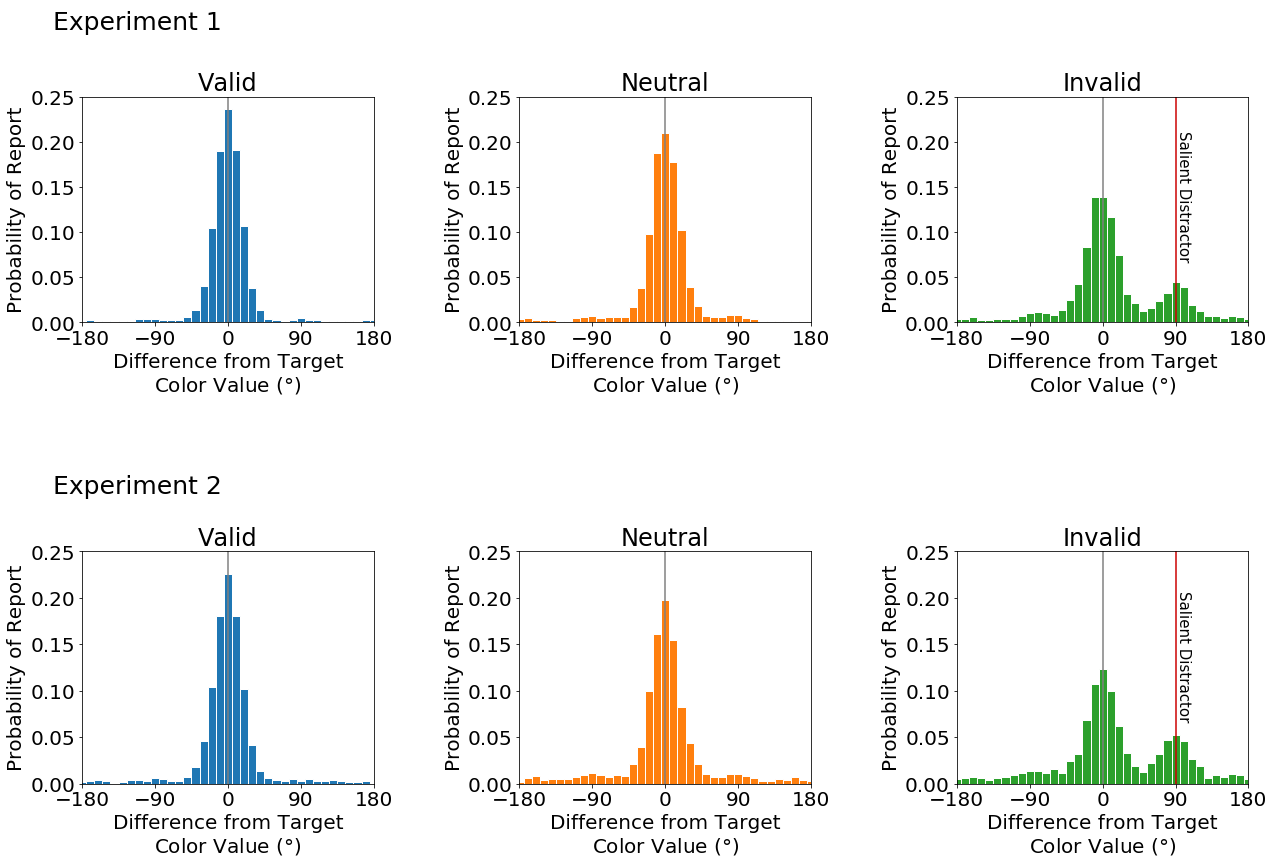

In [11]:
# gridspec inside gridspec
f = plt.figure(figsize=[18,12])
f.patch.set_facecolor('white')
plt.rc('font', size=20)

# Experiment 1
dataplot = dt1;
gs1 = gridspec.GridSpec(5, 3)
gs1.update(bottom = 0.53, left=0.05, top = 1, right=0.95, wspace=.5,hspace = 1)
plt.subplot(gs1[0,0])
plt.text(-0.1,0.5,'Experiment 1',fontsize = 25)
plt.axis('off')

# valid + neutral + invalid
ax1 = plt.subplot(gs1[1:-1,0])
myarray,weights = figure1data(1)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C0');
figure1setup(title = 'Valid')
ax2 = plt.subplot(gs1[1:-1,1])
myarray,weights = figure1data(0)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C1');
figure1setup(title = 'Neutral')
ax3 = plt.subplot(gs1[1:-1,2])
myarray,weights = figure1data(-1)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C2');
figure1setup(title = 'Invalid')
plt.plot([90,90],[0,0.25],color = [0.8,0,0])
plt.annotate('Salient Distractor',xy=(90,0.07),rotation=270,fontsize = 15)

# Experiment 2
dataplot = dt2;
gs2 = gridspec.GridSpec(5, 3)
gs2.update(bottom = 0, left=0.05, top = 0.47, right=0.95, wspace=.5,hspace = 0.5)
plt.subplot(gs2[0,0])
plt.text(-0.1,0.5,'Experiment 2',fontsize = 25)
plt.axis('off')

# valid + neutral + invalid
ax4 = plt.subplot(gs2[1:-1,0])
myarray,weights = figure1data(1)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C0');
figure1setup(title = 'Valid')
ax5 = plt.subplot(gs2[1:-1,1])
myarray,weights = figure1data(0)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C1');
figure1setup(title = 'Neutral')
ax6 = plt.subplot(gs2[1:-1,2])
myarray,weights = figure1data(-1)
plt.hist(myarray,weights=weights, bins = bins,edgecolor = [1,1,1],color = 'C2');
figure1setup(title = 'Invalid')
plt.plot([90,90],[0,0.25],color = [0.8,0,0])
plt.annotate('Salient Distractor',xy=(90,0.07),rotation=270,fontsize = 15);

## Figure 3

In [12]:
def preD(name):
    xvalid = [1,5]
    yvalid = [np.mean(ft1[name+'valid']),np.mean(ft2[name+'valid'])]
    yerrv = [stats.sem(ft1[name+'valid']),stats.sem(ft2[name+'valid'])]
    
    xneutral = [2,6]
    yneutral = [np.mean(ft1[name+'neutral']),np.mean(ft2[name+'neutral'])]
    yerrn = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]
    
    xinvalid = [3,7]
    yinvalid = [np.mean(ft1[name+'invalid']),np.mean(ft2[name+'invalid'])]
    yerri = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]
    
    return xvalid,yvalid,yerrv,xneutral,yneutral,yerrn,xinvalid,yinvalid,yerri
def plotbar(name):
    xvalid,yvalid,yerrv,xneutral,yneutral,yerrn,xinvalid,yinvalid,yerri = preD(name)
    plt.bar(xvalid,yvalid,yerr=yerrv)
    plt.bar(xneutral,yneutral,yerr=yerrn)
    plt.bar(xinvalid,yinvalid,yerr=yerri)
def plotB():
    widthi = .4
    name = 'b1'
    offtick = .2
    xvalid = [1-offtick,5-offtick]
    yvalid = [np.mean(ft1[name+'valid']),np.mean(ft2[name+'valid'])]
    yerrv = [stats.sem(ft1[name+'valid']),stats.sem(ft2[name+'valid'])]

    xneutral = [2-offtick,6-offtick]
    yneutral = [np.mean(ft1[name+'neutral']),np.mean(ft2[name+'neutral'])]
    yerrn = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]

    xinvalid = [3-offtick,7-offtick]
    yinvalid = [np.mean(ft1[name+'invalid']),np.mean(ft2[name+'invalid'])]
    yerri = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]

    plt.bar(xvalid,yvalid,yerr=yerrv,width=widthi)
    plt.bar(xneutral,yneutral,yerr=yerrn,width=widthi)
    plt.bar(xinvalid,yinvalid,yerr=yerri,width=widthi)

    name = 'b2'
    offtick = -.2
    xvalid = [1-offtick,5-offtick]
    yvalid = [np.mean(ft1[name+'valid']),np.mean(ft2[name+'valid'])]
    yerrv = [stats.sem(ft1[name+'valid']),stats.sem(ft2[name+'valid'])]

    xneutral = [2-offtick,6-offtick]
    yneutral = [np.mean(ft1[name+'neutral']),np.mean(ft2[name+'neutral'])]
    yerrn = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]

    xinvalid = [3-offtick,7-offtick]
    yinvalid = [np.mean(ft1[name+'invalid']),np.mean(ft2[name+'invalid'])]
    yerri = [stats.sem(ft1[name+'neutral']),stats.sem(ft2[name+'neutral'])]

    plt.bar(xvalid,yvalid,yerr=yerrv,width=widthi,color='C0',alpha=.5)
    plt.bar(xneutral,yneutral,yerr=yerrn,width=widthi,color='C1',alpha=.5)
    plt.bar(xinvalid,yinvalid,yerr=yerri,width=widthi,color='C2',alpha=.5)

In [13]:
legend_elements = [
    Patch(facecolor='C0',alpha = 0,label='Valid'),
    Patch(facecolor='C0',label='Control 1'),
    Patch(facecolor='C0',alpha = .5,label='Control 2'),
    
    Patch(facecolor='C1',alpha = 0,label='Neutral'),
    Patch(facecolor='C1',label='Control 1'),
    Patch(facecolor='C1',alpha = .5,label='Control 2'),
    
    Patch(facecolor='C2',alpha = 0,label='Invalid'),
    Patch(facecolor='C2',label='Salient'),
    Patch(facecolor='C2',alpha = .5,label='Control')]

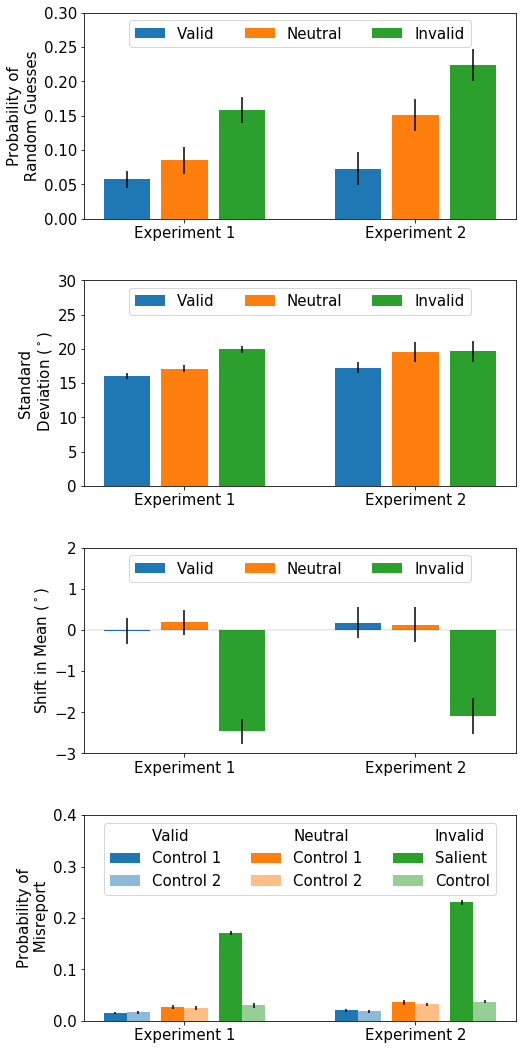

In [26]:
# gridspec inside gridspec
f = plt.figure(figsize = [6,14])
f.patch.set_facecolor('white')

gs1 = gridspec.GridSpec(4, 2)
gs1.update(bottom = 0, left=0, top = 1, right=1, wspace=.5,hspace = .3)
plt.subplot(gs1[0,:])
plotbar('g')
plt.legend(['Valid','Neutral','Invalid'],loc='upper center',fontsize = 15,bbox_to_anchor=(.5,1.0),ncol=3);
plt.xticks([2,6],['Experiment 1','Experiment 2'])
plt.ylim([0,.3])
plt.ylabel('Probability of\n Random Guesses ')

plt.subplot(gs1[1,:])
plotbar('sd')
plt.xticks([2,6],['Experiment 1','Experiment 2'])
plt.legend(['Valid','Neutral','Invalid'],loc='upper center',fontsize = 15,bbox_to_anchor=(.5,1.0),ncol=3);
plt.ylim([0,30])
plt.ylabel('Standard\n Deviation ($^\circ$)')

plt.subplot(gs1[2,:])
plotbar('mu')
plt.xticks([2,6],['Experiment 1','Experiment 2'])
plt.legend(['Valid','Neutral','Invalid'],loc='upper center',fontsize = 15,bbox_to_anchor=(.5,1.0),ncol=3);
plt.ylim([-3,2])
plt.axhline(color = 'k',alpha = .1)
plt.ylabel('Shift in Mean ($^\circ$)')

plt.subplot(gs1[3,:])
plotB()
plt.legend(handles = legend_elements,loc='upper center',bbox_to_anchor=(.5,1.0),ncol=3,
          fontsize = 15)
plt.xticks([2,6],['Experiment 1','Experiment 2'])
plt.ylim([0,.4])
plt.ylabel('Probability of\n Misreport');

## Figure 4

In [15]:
# create a new df
x = dt2[dt2.condition==1].ClickRange
y = np.abs(dt2[dt2.condition==1].Err)
dfv = pd.DataFrame({'x':x,'y':y})
dfv = dfv.drop(dfv[dfv.x==0].index)

x = dt2[dt2.condition==0].ClickRange
y = np.abs(dt2[dt2.condition==0].Err)
dfn = pd.DataFrame({'x':x,'y':y})
dfn = dfn.drop(dfn[dfn.x==0].index)

x = dt2[dt2.condition==-1].ClickRange
y = np.abs(dt2[dt2.condition==-1].Err)
dfi = pd.DataFrame({'x':x,'y':y})
dfi = dfi.drop(dfi[dfi.x==0].index)

x = dt2[(dt2.condition==0)|(dt2.condition==1)].ClickRange
y = np.abs(dt2[(dt2.condition==0)|(dt2.condition==1)].Err)
dfvn = pd.DataFrame({'x':x,'y':y})
dfvn = dfvn.drop(dfi[dfi.x==0].index)



# gen_quantile reversed : x = abs error; y = confidence range
def gen_quantile(df):
    n_num = 10
    n = np.arange(n_num)
    cutpoint = np.linspace(0,1,n_num+1)
    x_list = list();
    y_list = list();
    for i in n:
        y_cut_min = df.quantile(cutpoint[i])[1] # confidence range quantile
        y_cut_max = df.quantile(cutpoint[i+1])[1]
        x_cut = np.mean(df[(df.y > y_cut_min) & (df.y <= y_cut_max)].x) # abs error
        y_list.append((y_cut_min + y_cut_max)/2)
        x_list.append(x_cut)
    return x_list,y_list

x_list_v, y_list_v = gen_quantile(dfv)
x_list_n, y_list_n = gen_quantile(dfn)
x_list_i, y_list_i = gen_quantile(dfi)
x_list_vn, y_list_vn = gen_quantile(dfvn)

def plot_err_conf():
    plt.plot(y_list_v,x_list_v,'-o')
    plt.plot(y_list_n,x_list_n,'-o')
    plt.plot(y_list_i,x_list_i,'-o')
    plt.legend(['valid','neutral','invalid'],loc='center left', bbox_to_anchor=(1, 0.5));
    plt.ylabel('Confidence Size'); plt.xlabel('Abs Error');
    plt.title('quantile');


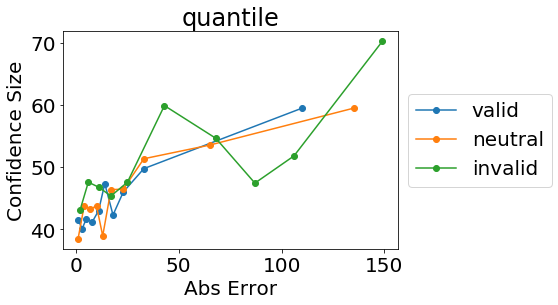

In [16]:
plot_err_conf()

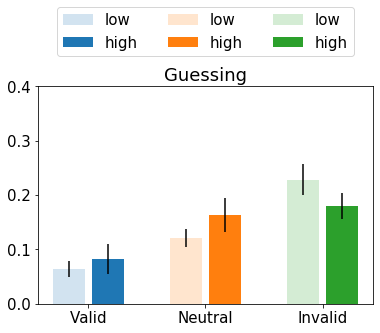

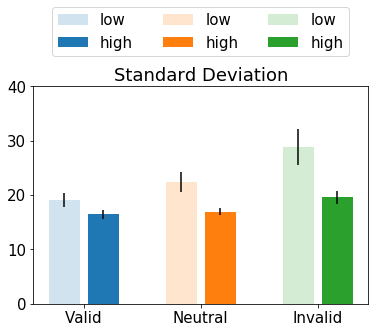

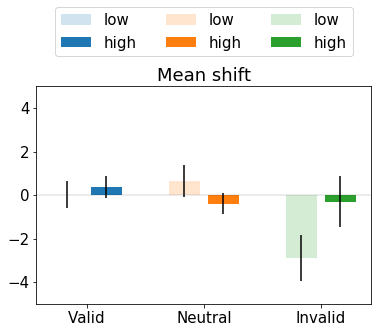

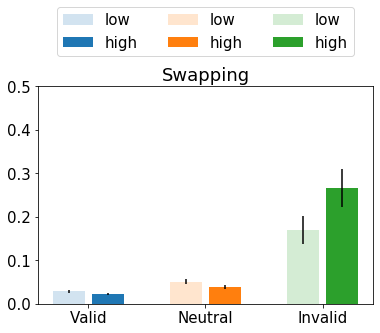

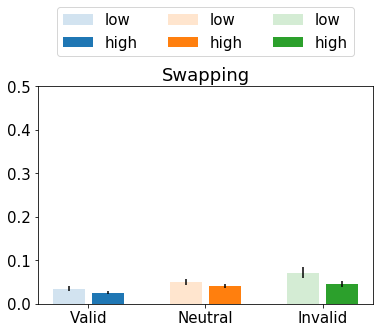

In [27]:
g = [np.mean(mdcr['g_v_lowcof']),np.mean(mdcr['g_v_highcof'])]
s = [scipy.stats.sem(mdcr['g_v_lowcof']),scipy.stats.sem(mdcr['g_v_highcof'])]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],g[0],yerr = s[0],alpha = 0.2,color = 'C0')
plt.bar([2],g[1],yerr = s[1],alpha = 1,color = 'C0')
g = [np.mean(mdcr['g_n_lowcof']),np.mean(mdcr['g_n_highcof'])]
s = [scipy.stats.sem(mdcr['g_n_lowcof']),scipy.stats.sem(mdcr['g_n_highcof'])]
plt.bar([4],g[0],yerr = s[0],alpha = 0.2,color = 'C1')
plt.bar([5],g[1],yerr = s[1],alpha = 1,color = 'C1')
plt.xticks([1.5,4.5],['Valid','Neutral'])
g = [np.mean(mdcr['g_i_lowcof']),np.mean(mdcr['g_i_highcof'])]
s = [scipy.stats.sem(mdcr['g_i_lowcof']),scipy.stats.sem(mdcr['g_i_highcof'])]
plt.bar([7],g[0],yerr = s[0],alpha = 0.2,color = 'C2')
plt.bar([8],g[1],yerr = s[1],alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['low','high','low','high','low','high'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Guessing')
plt.ylim([0,0.4]);

sd = [np.mean(mdcr['sd_v_lowcof']),np.mean(mdcr['sd_v_highcof'])]
s = [scipy.stats.sem(mdcr['sd_v_lowcof']),scipy.stats.sem(mdcr['sd_v_highcof'])]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],sd[0],yerr = s[0],alpha = 0.2,color = 'C0')
plt.bar([2],sd[1],yerr = s[1],alpha = 1,color = 'C0')
sd = [np.mean(mdcr['sd_n_lowcof']),np.mean(mdcr['sd_n_highcof'])]
s = [scipy.stats.sem(mdcr['sd_n_lowcof']),scipy.stats.sem(mdcr['sd_n_highcof'])]
plt.bar([4],sd[0],yerr = s[0],alpha = 0.2,color = 'C1')
plt.bar([5],sd[1],yerr = s[1],alpha = 1,color = 'C1')
plt.xticks([1.5,4.5],['Valid','Neutral'])
sd = [np.mean(mdcr['sd_i_lowcof']),np.mean(mdcr['sd_i_highcof'])]
s = [scipy.stats.sem(mdcr['sd_i_lowcof']),scipy.stats.sem(mdcr['sd_i_highcof'])]
plt.bar([7],sd[0],yerr = s[0],alpha = 0.2,color = 'C2')
plt.bar([8],sd[1],yerr = s[1],alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['low','high','low','high','low','high'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Standard Deviation');plt.ylim([0,40]);

mu = [np.mean(mdcr['mu_v_lowcof']),np.mean(mdcr['mu_v_highcof'])]
s = [scipy.stats.sem(mdcr['mu_v_lowcof']),scipy.stats.sem(mdcr['mu_v_highcof'])]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],mu[0],yerr = s[0],alpha = 0.2,color = 'C0')
plt.bar([2],mu[1],yerr = s[1],alpha = 1,color = 'C0')
mu = [np.mean(mdcr['mu_n_lowcof']),np.mean(mdcr['mu_n_highcof'])]
s = [scipy.stats.sem(mdcr['mu_n_lowcof']),scipy.stats.sem(mdcr['mu_n_highcof'])]
plt.bar([4],mu[0],yerr = s[0],alpha = 0.2,color = 'C1')
plt.bar([5],mu[1],yerr = s[1],alpha = 1,color = 'C1')
plt.xticks([1.5,4.5],['Valid','Neutral'])
mu = [np.mean(mdcr['mu_i_lowcof']),np.mean(mdcr['mu_i_highcof'])]
s = [scipy.stats.sem(mdcr['mu_i_lowcof']),scipy.stats.sem(mdcr['mu_i_highcof'])]
plt.bar([7],mu[0],yerr = s[0],alpha = 0.2,color = 'C2')
plt.bar([8],mu[1],yerr = s[1],alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['low','high','low','high','low','high'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Mean shift')
plt.axhline(color = 'k',alpha = .1)
plt.ylim([-5,5]);

b1 = [np.mean(mdcr['b1_v_lowcof']),np.mean(mdcr['b1_v_highcof'])]
s = [scipy.stats.sem(mdcr['b1_v_lowcof']),scipy.stats.sem(mdcr['b1_v_highcof'])]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],b1[0],yerr = s[0],alpha = 0.2,color = 'C0')
plt.bar([2],b1[1],yerr = s[1],alpha = 1,color = 'C0')
b1 = [np.mean(mdcr['b1_n_lowcof']),np.mean(mdcr['b1_n_highcof'])]
s = [scipy.stats.sem(mdcr['b1_n_lowcof']),scipy.stats.sem(mdcr['b1_n_highcof'])]
plt.bar([4],b1[0],yerr = s[0],alpha = 0.2,color = 'C1')
plt.bar([5],b1[1],yerr = s[1],alpha = 1,color = 'C1')
plt.xticks([1.5,4.5],['Valid','Neutral'])
b1 = [np.mean(mdcr['b1_i_lowcof']),np.mean(mdcr['b1_i_highcof'])]
s = [scipy.stats.sem(mdcr['b1_i_lowcof']),scipy.stats.sem(mdcr['b1_i_highcof'])]
plt.bar([7],b1[0],yerr = s[0],alpha = 0.2,color = 'C2')
plt.bar([8],b1[1],yerr = s[1],alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['low','high','low','high','low','high'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Swapping')
plt.ylim([0,0.5]);

b2 = [np.mean(mdcr['b2_v_lowcof']),np.mean(mdcr['b2_v_highcof'])]
s = [scipy.stats.sem(mdcr['b2_v_lowcof']),scipy.stats.sem(mdcr['b2_v_highcof'])]
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],b2[0],yerr = s[0],alpha = 0.2,color = 'C0')
plt.bar([2],b2[1],yerr = s[1],alpha = 1,color = 'C0')
b2 = [np.mean(mdcr['b2_n_lowcof']),np.mean(mdcr['b2_n_highcof'])]
s = [scipy.stats.sem(mdcr['b2_n_lowcof']),scipy.stats.sem(mdcr['b2_n_highcof'])]
plt.bar([4],b2[0],yerr = s[0],alpha = 0.2,color = 'C1')
plt.bar([5],b2[1],yerr = s[1],alpha = 1,color = 'C1')
plt.xticks([1.5,4.5],['Valid','Neutral'])
b2 = [np.mean(mdcr['b2_i_lowcof']),np.mean(mdcr['b2_i_highcof'])]
s = [scipy.stats.sem(mdcr['b2_i_lowcof']),scipy.stats.sem(mdcr['b2_i_highcof'])]
plt.bar([7],b2[0],yerr = s[0],alpha = 0.2,color = 'C2')
plt.bar([8],b2[1],yerr = s[1],alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['low','high','low','high','low','high'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Swapping')
plt.ylim([0,0.5]);

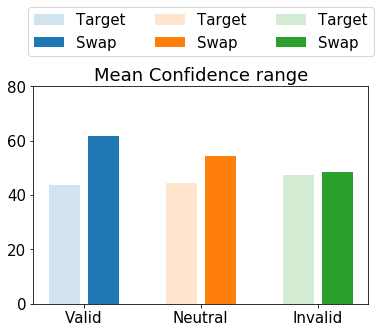

In [19]:
c1 = np.mean(dt2.loc[(np.abs(dt2['Err'])<45) & (dt2['condition']==1),'ClickRange'])
c2 = np.mean(dt2.loc[(((dt2['Err']>=45) &(dt2['Err']<135))
                     |((dt2['Err']<=-45) &(dt2['Err']>-135)) )
                     & (dt2['condition']==1),'ClickRange'])

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.rc('font', size=15) 
ax = plt.subplot()
plt.bar([1],c1,alpha = 0.2,color = 'C0')
plt.bar([2],c2,alpha = 1,color = 'C0')

c3 = np.mean(dt2.loc[(np.abs(dt2['Err'])<45) & (dt2['condition']==0),'ClickRange'])
c4 = np.mean(dt2.loc[(((dt2['Err']>=45) &(dt2['Err']<135))
                     |((dt2['Err']<=-45) &(dt2['Err']>-135)) )
                     & (dt2['condition']==0),'ClickRange'])


plt.bar([4],c3,alpha = 0.2,color = 'C1')
plt.bar([5],c4,alpha = 1,color = 'C1')


c5 = np.mean(dt2.loc[(np.abs(dt2['Err'])<45) & (dt2['condition']==-1),'ClickRange'])
c6 = np.mean(dt2.loc[(((dt2['Err']>=45) &(dt2['Err']<135))
                      )
                     & (dt2['condition']==-1),'ClickRange'])
plt.bar([7],c5,alpha = 0.2,color = 'C2')
plt.bar([8],c6,alpha = 1,color = 'C2')
plt.xticks([1.5,4.5,7.5],['Valid','Neutral','Invalid'])

plt.legend(['Target','Swap','Target','Swap','Target','Swap'],bbox_to_anchor=(0.5, 1.4),loc='upper center',ncol=3
          ,fontsize = 15)
plt.title('Mean Confidence range')
plt.ylim([0,80]);